RNN CON LSTM

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime
import keras

# 1. Importar los datos

In [2]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,23.6,96.0,NARE,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,26.7,95.0,NARE,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,24.0,96.0,NARE,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,0,4.6,22.4,98.0,NARE,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,1,0.0,21.0,98.0,NARE,40.62


# 2. Preprocesamiento

In [3]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal
Date,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62


In [4]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62,43.80


In [5]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,40.62,43.80


In [6]:
df['AporCaudal']

Date
2000-01-01    43.510
2000-01-02    43.670
2000-01-03    41.210
2000-01-04    43.800
2000-01-05    40.620
               ...  
2023-08-27    40.475
2023-08-28    39.386
2023-08-29    32.565
2023-08-30    28.913
2023-08-31    26.057
Name: AporCaudal, Length: 8637, dtype: float64

Reemplazar datos faltantes

In [7]:
df = df.fillna(df.mean())

In [8]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [9]:
df.tail()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2023-08-27,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,40.475,42.926
2023-08-28,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,26.4,39.386,40.475
2023-08-29,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,32.565,39.386
2023-08-30,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,28.913,32.565
2023-08-31,0.21,-0.07,0.23,-0.11,-0.32,-0.4,-0.24,0.07,0.29,0.38,1.3,0.0,26.057,28.913


In [10]:
df.columns.shape

(14,)

## 1.2 Normalizar los datos

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

In [12]:
scaled_data

array([[0.4717608 , 0.36797274, 0.39016897, ..., 0.        , 0.12387135,
        0.14351221],
       [0.4717608 , 0.36797274, 0.39016897, ..., 0.        , 0.12439802,
        0.12387135],
       [0.4717608 , 0.36797274, 0.39016897, ..., 0.        , 0.11630035,
        0.12439802],
       ...,
       [0.56644518, 0.47359455, 0.53917051, ..., 0.        , 0.08784329,
        0.11029622],
       [0.56644518, 0.47359455, 0.53917051, ..., 0.        , 0.07582186,
        0.08784329],
       [0.56644518, 0.47359455, 0.53917051, ..., 0.        , 0.06642066,
        0.07582186]])

## 1.2 Separar los datos de entrenamiento y validación

In [13]:
training_data_len = int(np.ceil(len(scaled_data)*0.9))

In [14]:
len(scaled_data)

8637

In [15]:
training_data_len

7774

In [16]:
train_data = scaled_data[:training_data_len]

In [23]:
train_data.shape

(7774, 14)

## 1.3 Crear ventana de tiempo

In [30]:
import numpy as np

# Definir la secuencia de entrada
n_input = 30
n_features = 14


# Función para generar secuencias de tiempo
def create_timeseries_generator(data, n_input, n_features):
    X, y = [], []
    for i in range(len(data) - n_input):
        # Sección de datos de entrada (X)
        X.append(data[i:i+n_input])
        # Valor siguiente (y)
        y.append(data[i+n_input])
    
    # Convertimos las listas a arrays de NumPy
    X = np.array(X)
    y = np.array(y)
    
    # Reshaping para asegurar que X tenga la forma (n_samples, n_input, n_features)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    
    return X, y



In [31]:
X_train, y_train = create_timeseries_generator(train_data, n_input, n_features)

In [33]:
X_train.shape

(7744, 30, 14)

# 3. Construir el modelo

In [35]:
import keras

# Build the Model
model = keras.models.Sequential()
# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],14)))
# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))
# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))
# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))
# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,697 (241.00 KB)

 Trainable params: 61,697 (241.00 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

# 4. Entrenar

In [37]:
training = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1963 - root_mean_squared_error: 0.2422
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1827 - root_mean_squared_error: 0.2251
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1811 - root_mean_squared_error: 0.2237
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1801 - root_mean_squared_error: 0.2229
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1766 - root_mean_squared_error: 0.2205
Epoch 6/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1766 - root_mean_squared_error: 0.2211
Epoch 7/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1765 - root_mean_squared_error: 0.2210
Epoch 8/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1759 - root_mean_squared_error: 0.2208
Epoch 9/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1759 - root_mean_squared_error: 0.2205
Epoch 10/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1761 - root_mean_s

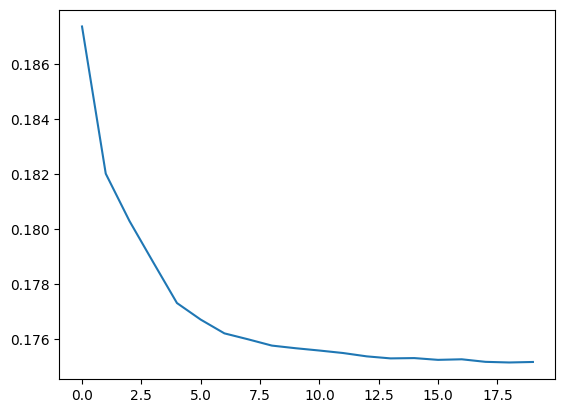

In [38]:
loss = training.history['loss']

plt.plot(loss)

# 6. Resultados

In [68]:
test_data = scaled_data[training_data_len - n_input:]

In [69]:
test_data.shape

(893, 14)

In [72]:
X_test, y_test = [], df[training_data_len:]


for i in range(30, len(test_data)):
    X_test.append(test_data[i-30:i])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],14))

In [134]:
predictions = model.predict(X_test)
predictions = np.repeat(predictions, 14, axis=1)
predictions = scaler.inverse_transform(predictions)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [137]:
predictions.shape[0]

863

In [118]:
train = df[:training_data_len]['AporCaudal']
test =  df[training_data_len:]['AporCaudal']

In [119]:
train.tail(1)

Date
2021-04-15    52.153
Name: AporCaudal, dtype: float64

In [120]:
train.shape

(7774,)

In [121]:
test.head(1)

Date
2021-04-16    84.95
Name: AporCaudal, dtype: float64

In [147]:
test.shape

(863,)

In [143]:
predictions = predictions[:, 0] 

In [148]:
predictions.shape

(863,)

In [151]:
predictions_df = pd.DataFrame(predictions, index=test.index)


In [153]:
predictions_df.head(1)

,0
Date,
2021-04-16,-0.457375


In [154]:
test

Date
2021-04-16    84.950
2021-04-17    60.054
2021-04-18    54.895
2021-04-19    52.767
2021-04-20    48.497
               ...  
2023-08-27    40.475
2023-08-28    39.386
2023-08-29    32.565
2023-08-30    28.913
2023-08-31    26.057
Name: AporCaudal, Length: 863, dtype: float64

In [155]:
predictions.shape

(863,)

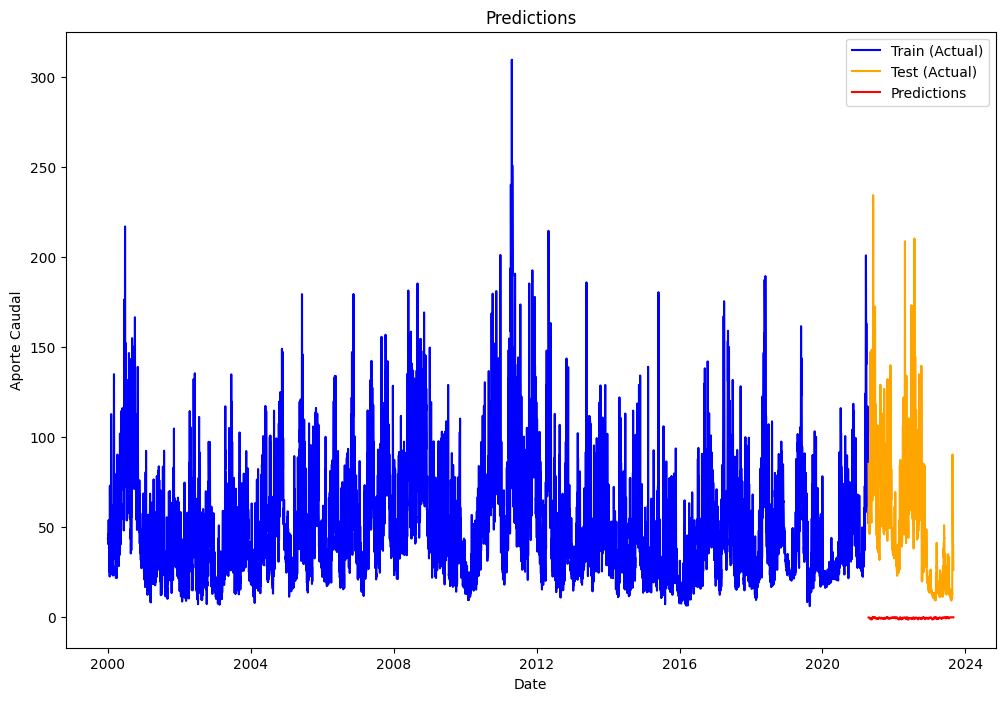

In [156]:


plt.figure(figsize=(12,8))
plt.plot(train, label="Train (Actual)", color='blue')
plt.plot(test, label="Test (Actual)", color='orange')
plt.plot(predictions_df, label="Predictions", color='red')
plt.title("Predictions")
plt.xlabel("Date")
plt.ylabel("Aporte Caudal")
plt.legend()
plt.show()